In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Helper finctions zero

def sigmoid(z):
    s=1/(1+np.exp(-z))
    cache=z
    return s,cache

def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True)
    return dZ

def sigmoid_backward(dA, cache):
    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ



In [5]:
#Helper function 1 : Initialise parameters

def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters={}
    L= len(layer_dims)
    for l in range(1,L):
        parameters['W'+str(l)]= np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b'+str(1)]=np.zeros((layer_dims[1],1))
    return parameters

In [6]:
#Helper function 2 : Linear Forward

def linear_forward(A,W,b):
    Z=np.dot(A,W) + b
    cache=(A,W,b)
    return Z,cache


In [7]:
#Helper function 3 : Linear Activation Forward

def linear_activation_forward(A_prev,W,b,activation):
    
    if activation=="sigmoid":
        Z,linear_cache= linear_forward(A_prev,W,b)
        A,activation_cache=sigmoid(Z)

    elif activation=="relu":
        Z,linear_cache= linear_forward(A_prev,W,b)
        A,activation_cache=relu(Z)
        
    cache=(linear_cache, activation_cache)
    return A, cache
        

In [8]:
def L_model_forward(X,parameters):
    caches=[]
    A=X
    L=len(parameters)//2
    
    for  l in range(1,L):
        A_prev=A
        A,cache=linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],activation="relu")
    caches.append(cache)
    
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],activation="sigmoid")
    caches.append(cache)
    
    return AL,caches


In [9]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    cost = -1/m*np.sum(np.multiply(Y,np.log(AL))+np.multiply((1-Y),np.log(1-AL)))
    cost = np.squeeze(cost)   
    return cost


In [10]:
def linear_backward(dZ,cache):
    A_prev,W,b= cache
    m=A_prev.shape[1]
    dw=1/m(np.dot(dZA_prev.T))
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    return( dA_prev, dW, db)

In [11]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
       
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return (dA_prev, dW, db)

In [12]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L=len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y,AL) - np.divide(1-Y, 1-AL))
  
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")
   
    for l in reversed(range(L-1)):
        current_cache = caches[L-2-l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, activation='relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
       
    return grads

In [13]:
def update_parameters(parameters, grads,learning_rate):
    
    L=len(parameters)//2
    for l in range(1,L):
        parameters['W'+str(l+1)]=parameters['W'+str(l+1)]-learning_rate*gards['dW'+str(l+1)]
        parameters['b'+str(l+1)]=parameters['b'+str(l+1)]-learning_rate*gards['db'+str(l+1)]
    return parameters

In [14]:
import h5py
def load_dataset():
    
    hdf5_path = 'dataset.hdf5'

    hdf5_file = h5py.File(hdf5_path, "r")
    print("Reading From File.............")

    print("x : Training")
    print("Number of examples : "+ str(hdf5_file["train_img"].shape[0]))
    print("Pixel size : "+ str(hdf5_file["train_img"].shape[1]))

    print("x : Testing")
    print("Number of examples : "+ str(hdf5_file["test_img"].shape[0]))
    print("Pixel size : "+ str(hdf5_file["test_img"].shape[1]))

    print("y : ")
    print("No. of Training Lables : " + str(hdf5_file["train_labels"].shape[0]))
    print("No. of Testing Labels : "+ str(hdf5_file["test_labels"].shape[0]))

    print("Transferring to Numpy Array......")
    
    train_x = np.array(hdf5_file["train_img"])
    test_x = np.array(hdf5_file["test_img"])

    train_y = np.array(hdf5_file["train_labels"])
    test_y = np.array(hdf5_file["test_labels"])
    
    print("Transfer to Numpy array Complete.......")
     
    print("Plotting an image to verify.......") 
    
    index = 30
    image = "cat"
    plt.imshow(train_x[index])
    if (train_y[index]==1):
        image="dog"
    print ("y = " + str(train_y[index]) + ", it's a " + str(image) +" picture.")
    
    return train_x,train_y,test_x,test_y

Reading From File.............
x : Training
Number of examples : 317
Pixel size : 224
x : Testing
Number of examples : 80
Pixel size : 224
y : 
No. of Training Lables : 317
No. of Testing Labels : 80
Transferring to Numpy Array......
Transfer to Numpy array Complete.......
Plotting an image to verify.......
y = 1, it's a dog picture.
train_x's shape: (150528, 317)
test_x's shape: (150528, 80)


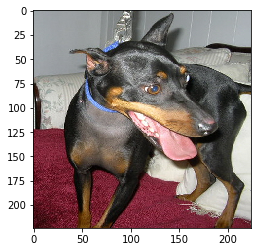

In [15]:
train_x_orig, train_y, test_x_orig, test_y = load_dataset()

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T  
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T


train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))



In [16]:
layers_dims = [150528, 317, 7, 5, 1]
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 30, print_cost=False):
    
    np.random.seed(1)
    costs = []                      
    parameters = initialize_parameters(layers_dims)
   
    for i in range(0, num_iterations):

        
        AL, caches = L_model_forward(X, parameters)
     
        cost = compute_cost(AL, Y)
    
        grads = L_model_backward(AL, Y, caches)
    
        parameters = update_parameters(parameters, grads, learning_rate)
       
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 25, print_cost = True)